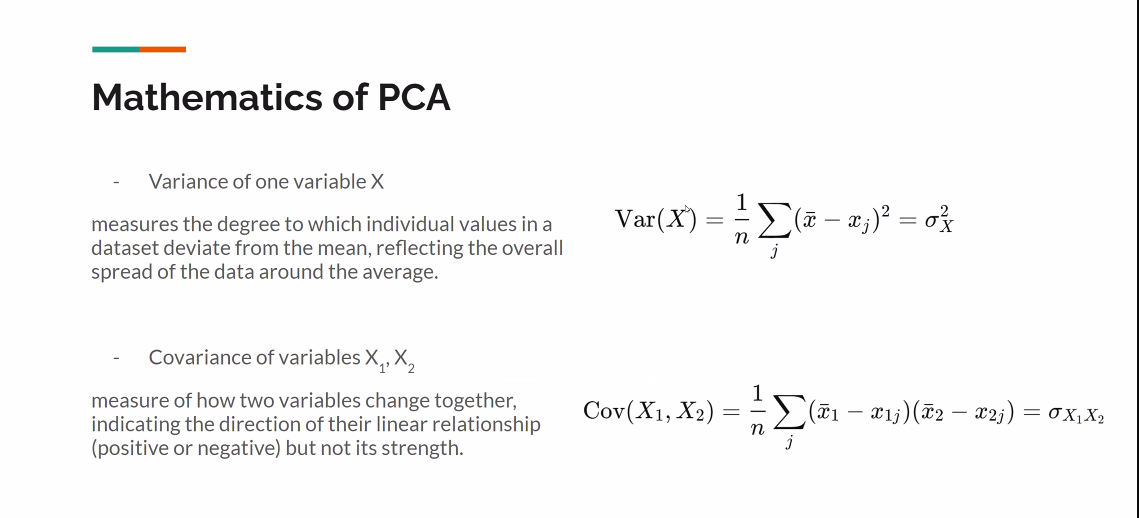

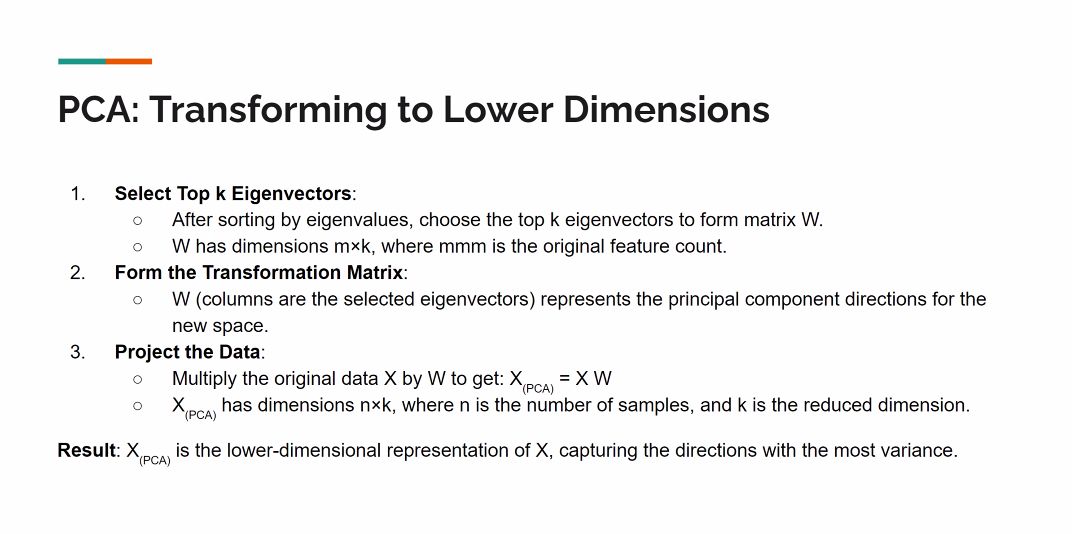

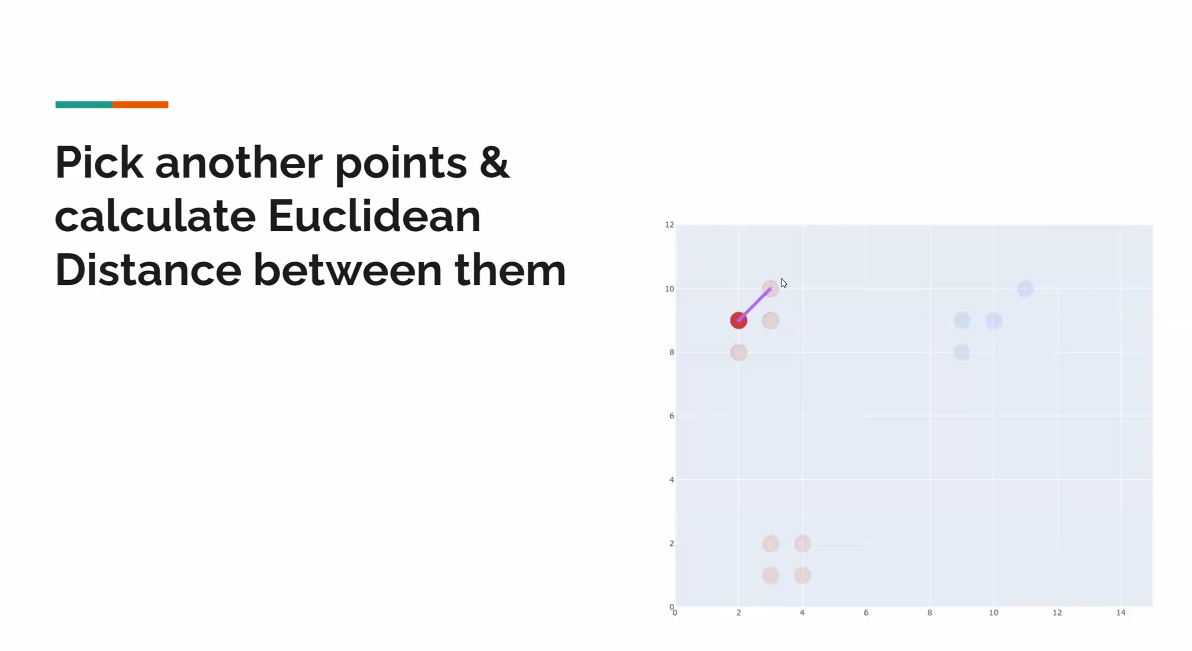

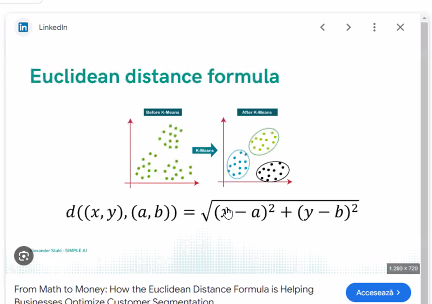

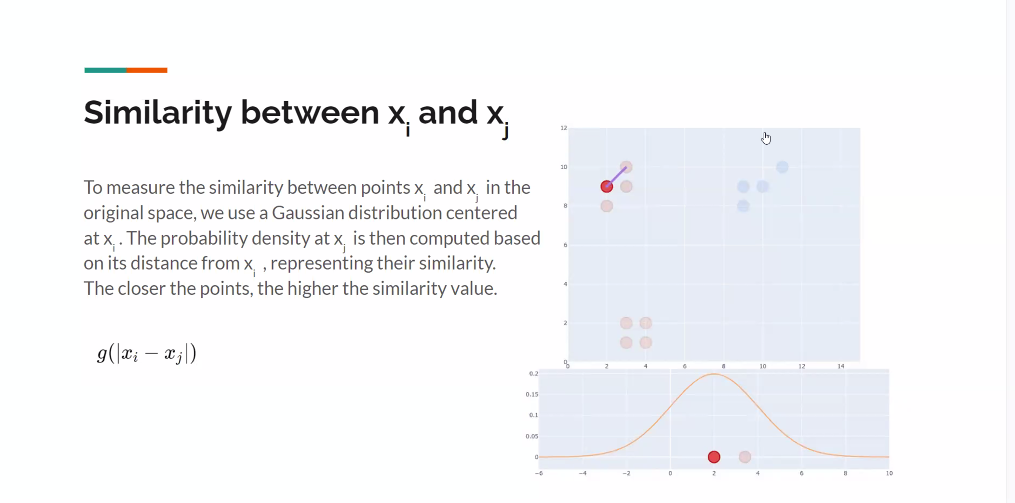

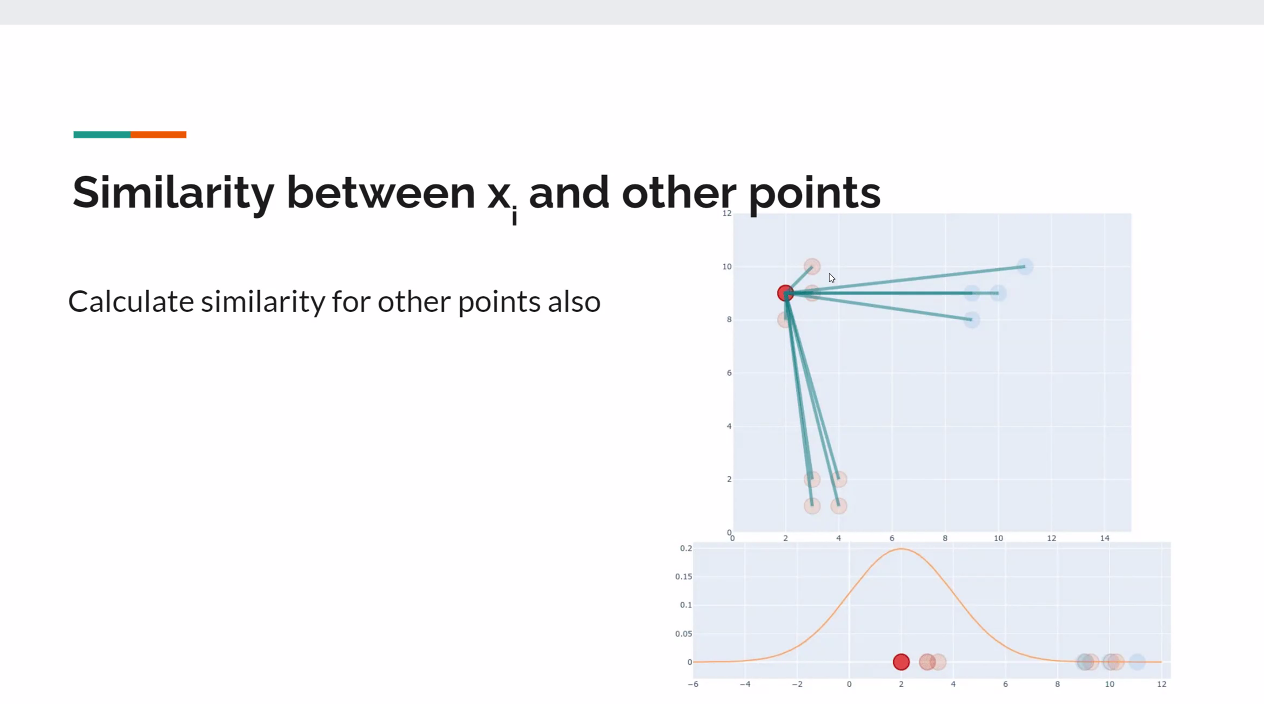

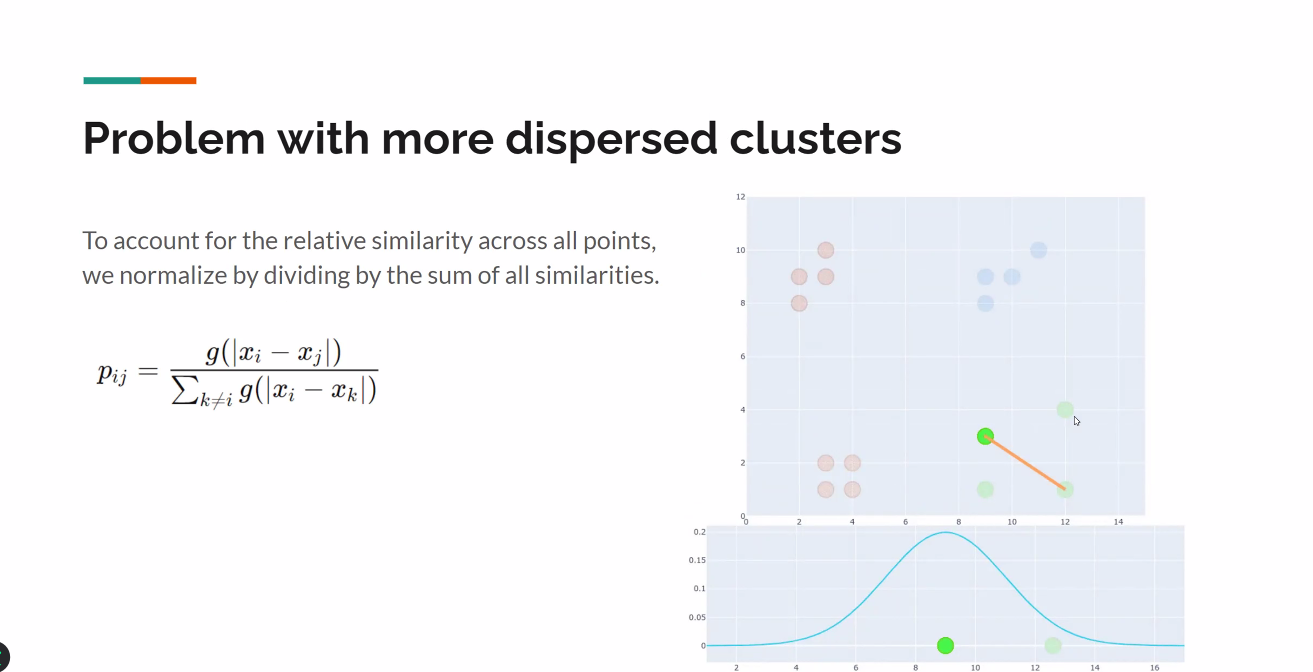

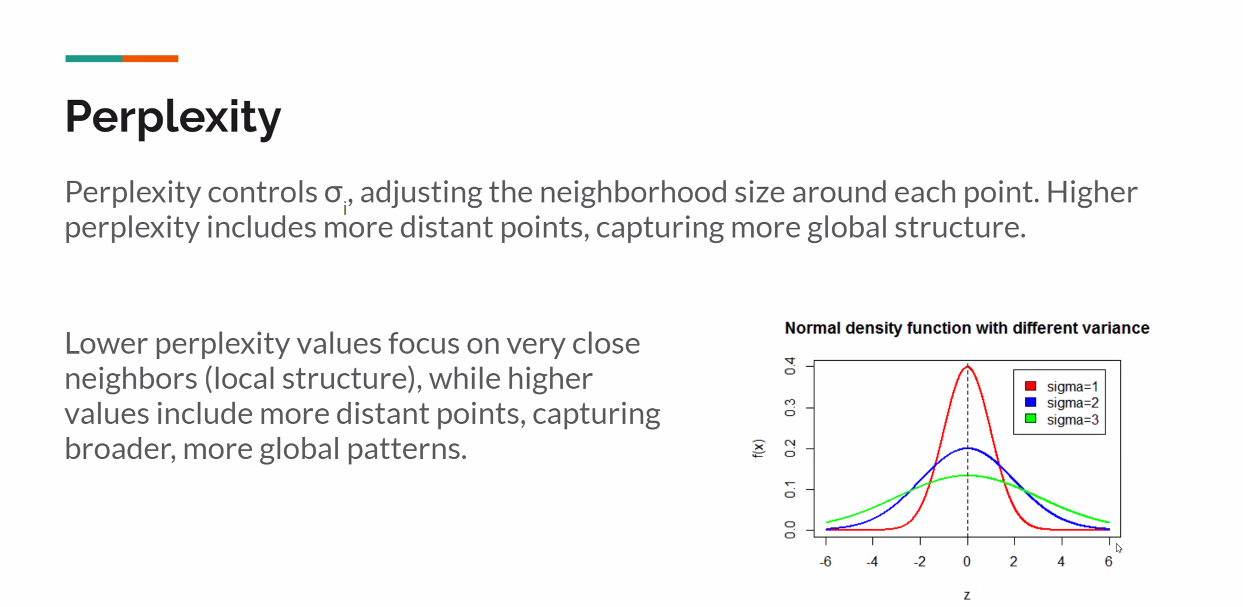

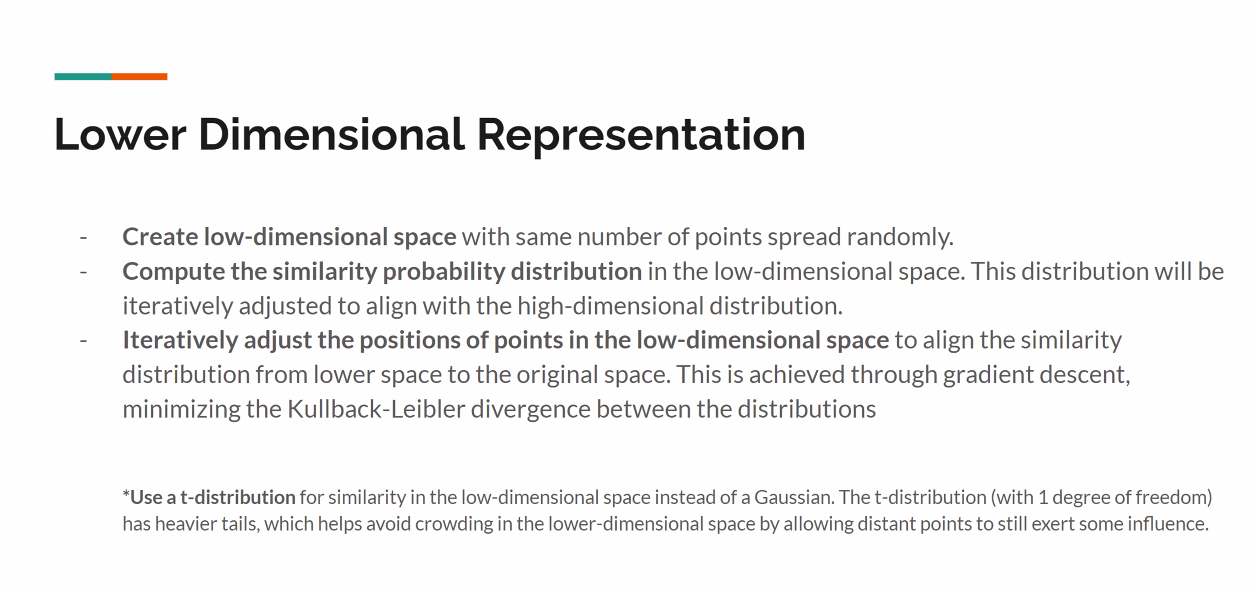

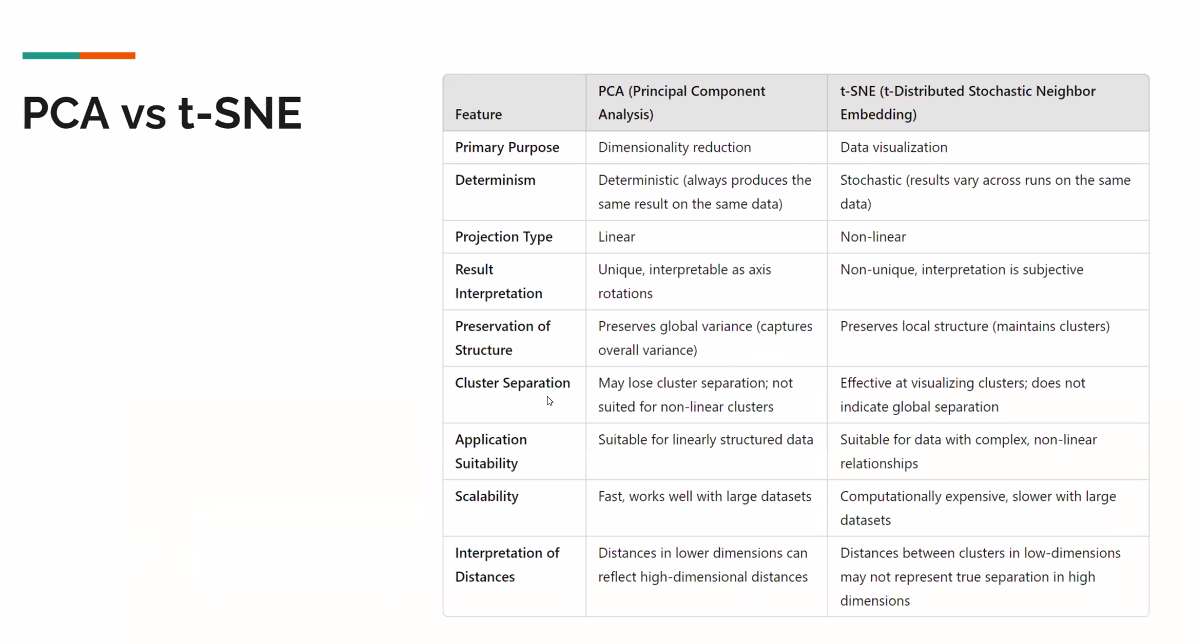

In [ ]:
from sklearn import datasets, decomposition
import numpy as np
import pandas as pd

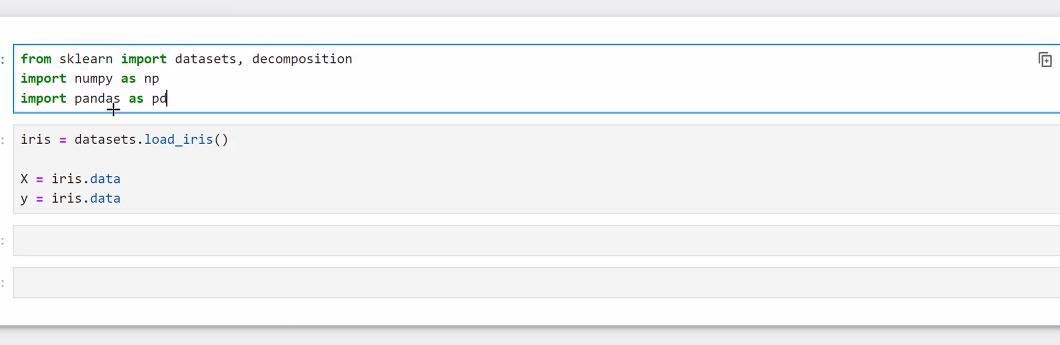

In [ ]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

In [ ]:
iris.feature_names

In [ ]:
x = pd.DataFrame(x, columns=iris.feature_names)

In [ ]:
x.info()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection="3d")
ax.scatter(x[:,0], x[:,1], x[:,2], c=y, columns="viridis")

ax.set_xlabel("Sepal lenght")
ax.set_ylabel("Sepal widht")
ax.set_zlabel("petal lenght")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  
scaler = StandardScaler()
x_processed = scaler.fit_transform(x)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_processed)


In [ ]:
x_pca.shape

In [ ]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.colorbar(scatter, label="Class Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split


x_train_val, x_test, y_train_val, y_test = train_test_split(x,y, test_size=0.5, stratify=y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

In [ ]:
x_train.shape, x_val.shape, x_test.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(x_train, y_train)
y_pred =  model.predict(x_val)
accuracy_score(y_val, y_pred)

In [ ]:
scaler = StandardScaler()
x_train_processed = scaler.fit_transform(x_train)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_processed)


In [ ]:
x_val_processed = scaler.transform(x_val)
x_val_pca = pca.transform(x_val_processed)
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(x_train_pca, y_train)
y_pred = model.predict(x_val_pca)
accuracy_score(y_val, y_pred)
accuracy_score(y_val, y_pred)

In [ ]:
digits = datasets.load_digits()

x = digits.data
y = digits.target

In [ ]:
plt.figure(figsize=(6,3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i, :])
    plt.title(f'Digit: {y[i]}')

In [ ]:
x[0, :].reshape

In [ ]:
pca = PCA(n_components=2)
x_scaled = scaler.fit_transform(x)
x_pca = pca.fit_transform(x_scaled)
x_pca.shape

plt.figure(figsize=(8,6))

scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.colorbar(scatter, label="Class Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [ ]:
pca = PCA().fit(x_scaled)

np.cumsum(pca.explained_variance_ratio_)


In [ ]:
plt.figure(figsize=(10,6))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()

x_tsne = tsne.fit_transform(x)
plt.figure(figsize=(12,10))

plt.scatter(x_tsne[:, 0], x[:, 1], c=y, s=40, alpha=0.7)
plt.colorbar()